# Finite Element Method in one dimension

\begin{align}
&- u''(x) + cu(x) = f(x) \\
& x \in \Omega = (a, b) \\
&u(a) = \alpha \text{, } u(b) = \beta
\end{align}

\begin{align}
&\phi \in \mathcal{C}^1([a, b]) \text{ almost everywhere} \\
&\phi(a) = 0 \text{, } \phi(b) = 0
\end{align}

For $c = 0$ we have
$$
- u''(x) = f(x)
$$

Multiplying both sides by $\phi(x)$ we have
$$
-u''(x) \phi(x) = f(x) \phi(x)
$$
and integrating in $x$ we obtain
$$
\int_a^b -u''(x) \phi(x) dx = \int_a^b f(x) \phi(x) dx \text{.}
$$
Using integration by parts and the fact that $\phi$ vanishes at ends of the interval we finally obtain
$$
\int_a^b u'(x) \phi'(x) dx = \int_a^b f(x) \phi(x) dx \text{.}
$$

<<<some text about the space of $\phi$ functions etc.>>>

[...] Let us denote partition of the $[a, b]$ interval as $T_h([a, b]) = \{\tau_k\}$, where $\tau_k = (x_k, x_{k+1})$ and $a = x_0 < x_1 < ... < x_N = b$ and $h = \max_k |x_k - x_{k+1}|$.

$$
V^h = \left\{ u \in \mathcal{C}([a, b])\colon \left. u\right|_\tau \in P_1  \forall_{\tau \in T([a, b])} \text{,} u(a) = u(b) = 0\right\}
$$

$$
P_1 = \text{span}(\{1, x\})
$$

$$
V^h \subset V
$$

## Finite Element Method (the important part)
The goal is to find function $u_h \in V^h$ such that
$$
\int_a^b u_n'(x) \phi'(x) dx = \int_a^b f(x) \phi(x) dx \qquad \forall \phi \in V^h
$$
Function $u_h$ can be written as
$$
u_h(x) = \sum_{k=1}^{N-1} u_h(x_k) \phi_k(x)
$$
because functions $\phi_k$ create a base for that space >elaborate more on that<.
The substituting we get
$$
\sum_{k=1}^{N-1} u_n(x_k) \int_a^b \phi_k'(x) \phi_l'(x) dx = \int_a^b f(x) \phi_l(x) dx
$$

By writing
\begin{align}
&\mathbf{u} = \left( u(x_1), \dots, u(x_{N-1}) \right)^\top \\
&\mathbf{f} = \left( \int_a^b f(x) \phi_1(x) dx, \dots, \int_a^b f(x) \phi_{N-1}(x) dx \right)^\top \\
&\mathbf{A}_h = \left( \int_a^b \phi_l'(x) \phi_k'(x) dx \right)_{k, l = 1}^{N-1}
\end{align}

we can rewrite previous problem as an algebraic one
$$
\mathbf{A}_h \mathbf{u} = \mathbf{f}
$$

## Construction of the basis functions


.>some text about those functions, but for now i prefer coding.<

In [2]:
# Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)  # Making the plots a little bit bigger.

In [23]:
def hat_function(x: np.ndarray, left: float, right: float, middle: float=None) -> np.ndarray:
    if left > right:
        raise ValueError("Left point cannot be greater than right one.")
    if middle is None:
        middle = left + (right - left) / 2
    if not left <= middle <= right:
        raise ValueError("Middle point must be between {left} and {right}.")
    ans = np.copy(x)
    ans[(x <= left) | (right <= x)] = 0.0
    ans[(left < x) & (x <= middle)] = (x[(left < x) & (x <= middle)] - left) / (middle - left)
    ans[(middle < x) & (x <= right)] = (right - x[(middle < x) & (x <= right)]) / (right - middle)
    return ans

In [109]:
# Some local test of other functions
def rounded_hat_function(x: np.ndarray, left: float, right: float, middle: float=None) -> np.ndarray:
    if middle is None:
        middle = left + (right - left) / 2
    ans = np.copy(x)
    ans[(x <= left) | (right <= x)] = 0.0
    ans[(left < x) & (x < right)] = (x[(left < x) & (x < right)] - left) * (x[(left < x) & (x < right)] - right) \
                                    * 4 / (4 * left * right - (right + left) ** 2) # Factor needed for scaling
    return ans

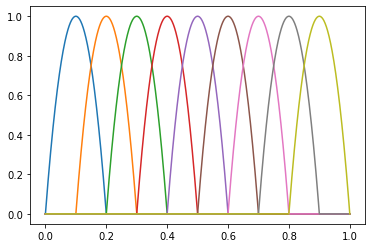

In [111]:
a, b = 0, 1
num_of_nodes = 10
h = (b - a) / num_of_nodes
t = np.linspace(a, b, num=1000)
for left in np.arange(a, b - h, h):
    plt.plot(t, rounded_hat_function(t, left, left + 2 * h))

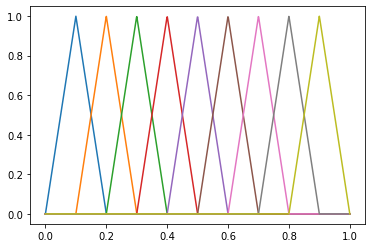

In [24]:
# Plotting exemplary hat functions
a, b = 0, 1  # Interval boundaries
num_of_nodes = 10
h = (b - a) / num_of_nodes  # Distance between neighbour nodes
t = np.linspace(a, b, num=1000)  # Domain
for left in np.arange(a, b - h, h):
    plt.plot(t, hat_function(t, left, left + 2 * h))

### [TMP] Integration
Integrals of the $\phi$ functions are very easy to calculate but using numerical integration can provide us with a framework which will allow us later to change basis functions without chaning the code.

0.24999974949924897

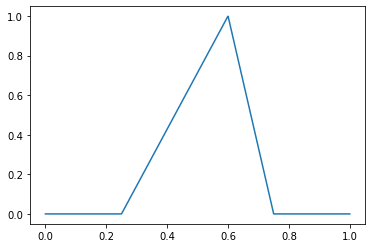

In [113]:
# Exeplary numerical integration
from scipy.integrate import trapz
f = hat_function(t, 0.25, 0.75, 0.6)
plt.plot(t, f)
trapz(f, t)

### [TMP] Differentiation
Same as above, numerical differentiation would allow us to use the code without need to recalculate derivatives for new basis functions.

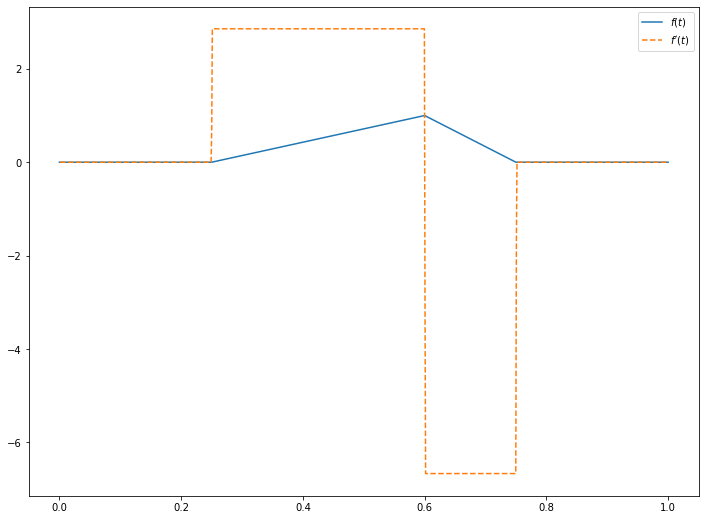

In [6]:
# Exemplary numerical differentiation
plt.plot(t, f, label='$f(t)$')
plt.plot(t[1:], np.diff(f) / np.diff(t), '--', label='$f\'(t)$')
plt.legend()

## Solution
We can now construct general solution for our problem. Let us assume that we're dealing with a problem of a form
$$
-u''(x) = sin(2x)
$$
for $x \in (0, 2\pi)$.
We know that the solution would be $u(x) = \frac{\sin 2x}{4}$ so we can check it easily.

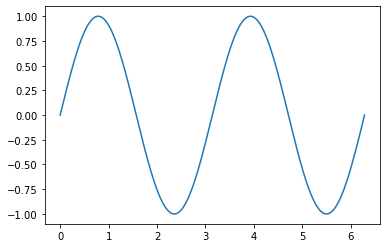

In [115]:
a, b = 0, 2 * np.pi
x = np.linspace(a, b, num=1000)
f = np.sin(2 * x)
plt.plot(x, f)

Let's define our basis functions $\phi(x)$.

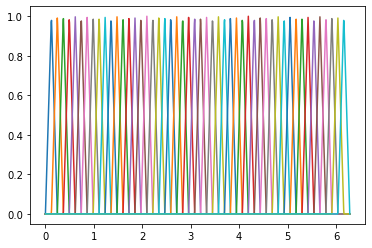

In [133]:
num_of_nodes = 50  # Here you can play with the number of nodes! Just change it and run consecutive cells.
# NOTE: If it happens that the last function is cut in half it won't work. I don't know yet why though.
h = (b - a) / (num_of_nodes + 1)
base_functions = []
for left in np.arange(a, b - h, h):
    phi = hat_function(x, left, left + 2 * h)
#     phi = rounded_hat_function(x, left, left + 2 * h)
    base_functions.append(phi)
    plt.plot(x, phi)

And their derivatives $\phi'(x)$.

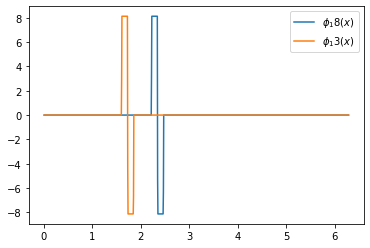

In [134]:
import random
diff_x = x[1:]
base_functions_derivatives = [np.diff(phi) / np.diff(x) for phi in base_functions]
for k, bfd in random.sample(list(enumerate(base_functions_derivatives)), 2):
    plt.plot(diff_x, bfd, label='$\phi_{}(x)$'.format(k))
plt.legend()

We can now calculate the $\mathbf{A}_h$ matrix.

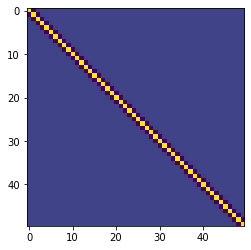

In [123]:
A = np.array([[trapz(phi1 * phi2, diff_x) for phi1 in base_functions_derivatives] for phi2 in base_functions_derivatives])
plt.imshow(A)

And the $\mathbf{f}$ vector.

.>> HERE IT STARTS TO GET MESSY, SORRY << 

In [124]:
f_vec = np.array([trapz(f * phi, x) for phi in base_functions])

And now the magic happens, we get the $\mathbf{u}$, wow!

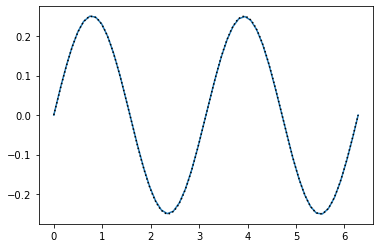

In [138]:
middle_points = np.arange(a + h, b, h)
u_vec = np.dot(np.linalg.inv(A), f_vec)
# Add zeros to beginning and end, because u(a) = u(b) = 0
middle_points_ext = np.array([a, *middle_points, b])
u_vec_ext = np.array([0., *u_vec, 0.])


u_ans = np.dot(u_vec, np.array(base_functions))
plt.plot(x, u_ans)


# proper_solution =  1 / 4 * np.sin(2*x)
plt.plot(x, proper_solution, 'k:', label='Proper solution')
# plt.plot(middle_points_ext, u_vec_ext, 'ro', label='Calculated points')
# plt.plot(middle_points_ext, u_vec_ext, 'r', alpha=0.5, label='Linear interpolation')
# plt.legend()
# plt.show()